In [ ]:
import pandas as pd #pandas is necessary to turn datasets into dataframes. as pd means we change the name pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
iris  = load_iris() #()is used to call the function load_iris. we are giving the value load_iris() into a variable name iris.

In [ ]:
dir(iris) #dir() function is used to see the contents of an dataset

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
#We use pd.DataFrame() function to turn datasets into dataframes.
#we are converting the contents of dataset iris into dataframe.
#without and feture_names from the content as columns. without the column names the it would considers the dummy values

In [ ]:
X.head() # head() is a function that shows first 5 rows of the dataframe. so we are using X.head() to get first five rows of the dataframe X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
print(iris.data.shape) #we use .shape to identify rows and columns.
print(iris.target.shape)

(150, 4)
(150,)


In [ ]:
y = pd.DataFrame(iris.target, columns = ['species'] ) # we created y to make data frame of the output lables(list of labels/species). and iris.target to get output lables(list of labels/species)
#we used 'species' because there was only one column in the target rather than using a number as a label. we used print(iris.target.shape) to determine the number of columns earlier.

In [ ]:
y.head() # head() is a function that shows first 5 rows of the dataframe. so we are using y.head() to get first five rows of the dataframe y

,species
0,0
1,0
2,0
3,0
4,0


In [ ]:
y.species.unique() # unique() is used for see values of the lables(species)

array([0, 1, 2])

In [ ]:
y.species.replace({0:'setosa', 1:'versicolor', 2:'virginica'}, inplace = True) # we used .repalce function to replace the values of species of numbers into actual species names.
# {}is used for dictionary. inplace = True is used to make change into the original data, so it make the changes permenant

In [ ]:
y.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df = pd.concat([X,y], axis = 1) #merging dataframes together.

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


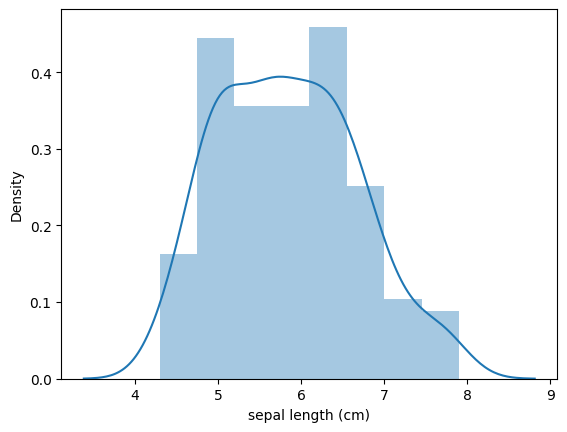

In [ ]:
sns.distplot(df['sepal length (cm)']);

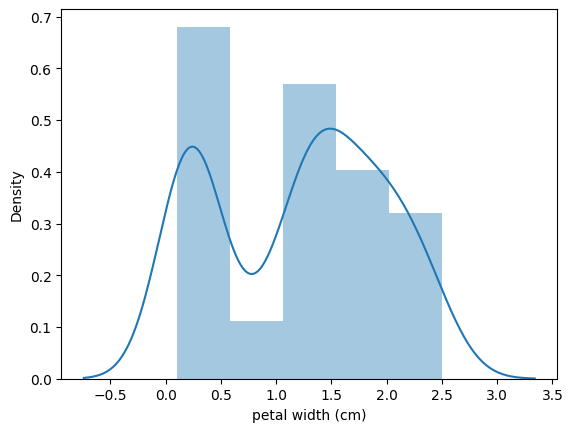

In [ ]:
sns.distplot(df['petal width (cm)']);

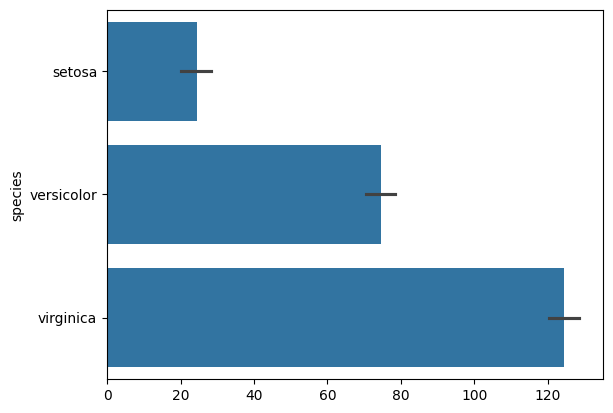

In [ ]:
sns.barplot(df['species']);

In [ ]:
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.decomposition import PCA
pca  = PCA(0.95)
Xpca = pca.fit_transform(X_scaled)

In [ ]:
X_pca = pd.DataFrame(Xpca, columns = ['PC1', 'PC2'])

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
def kfold(estimator, inp, tar):
  return cross_val_score(estimator, inp, tar).mean() * 100

In [ ]:
kfold(LogisticRegression(), X_train, y_train)

np.float64(86.66666666666669)

In [ ]:
kfold(RandomForestClassifier(), X_train, y_train)

np.float64(95.0)

In [ ]:
kfold(SVC(), X_train, y_train)

np.float64(95.83333333333334)

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(),{
    'C' : [0.5,1,2,3]
})
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.5, 1, 2, 3]})

In [ ]:
clf_df = pd.DataFrame(clf.cv_results_)

In [ ]:
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
clf_df[['param_C', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending=False)

,param_C,mean_test_score
0,0.5,0.958333
1,1.0,0.958333
2,2.0,0.958333
3,3.0,0.958333


In [ ]:
model = SVC(C = 0.5)
model.fit(X_train, y_train)

SVC(C=0.5)

In [ ]:
model.score(X_test,y_test)*100

96.66666666666667

In [ ]:
pred = model.predict(X_test)

In [ ]:
y_test[:5]

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [ ]:
pred[:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



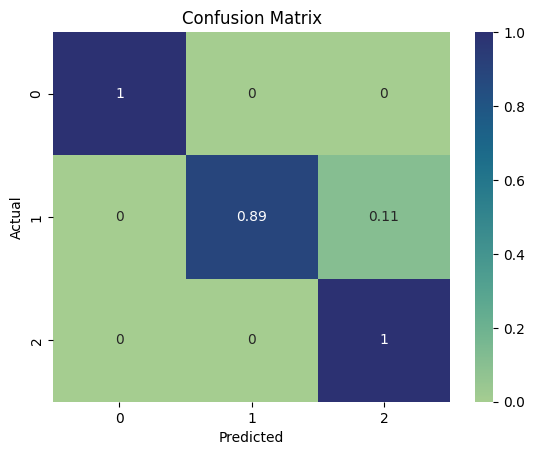

In [ ]:
cf = confusion_matrix(y_test, pred, normalize='true')
sns.heatmap(cf, annot  = True, cmap = 'crest');
plt.xlabel('Predicted');
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 1. Your new measurement
new_data = [[6.3, 3.3, 6.0, 2.5]]

# 2. Scale it like training data
new_data_scaled = scaler.transform(new_data)

# 3. Apply PCA like training data
new_data_pca = pca.transform(new_data_scaled)

# 4. Predict
prediction = model.predict(new_data_pca)

# 5. Map result
print("Predicted species:", prediction[0])



Predicted species: virginica
